# Analysis

In [1]:
# Based on the results, Capomulin and Ramicane showed the most effective results in the decrease of tumor volume over time.
# The results also showed that tumor volume and weight were correlated

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [8]:
# Study data files
mouse_metadata_path = "C:/Users/17202/Documents/GitHub/Matplotlib-Challenge/Resources/Mouse_metadata.csv"
study_results_path = "C:/Users/17202/Documents/GitHub/Matplotlib-Challenge/Resources/Study_results.csv"

In [9]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [10]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [11]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [12]:
# Combine the data into a single dataset
completedata = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Remove any duplicate data
completedata.drop_duplicates(subset=["Mouse ID"], inplace=False)

# Display the data table for preview
completedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
totalmice = len(completedata["Mouse ID"].value_counts())
totalmice

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = completedata.loc[completedata.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_df

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = completedata[completedata.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = completedata[completedata["Mouse ID"]!="g989"]

cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
cleantotal = len(cleandata["Mouse ID"].value_counts())
cleantotal

248

# Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_data = completedata.groupby("Drug Regimen")

In [19]:
# Calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = regimen_data["Tumor Volume (mm3)"].mean()
tumor_median = regimen_data["Tumor Volume (mm3)"].median()
tumor_var = regimen_data["Tumor Volume (mm3)"].var()
tumor_sd = regimen_data["Tumor Volume (mm3)"].std()
tumor_sem = regimen_data["Tumor Volume (mm3)"].sem()

In [20]:
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame ({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_var,
    "Tumor Volume Std. Dev." : tumor_sd,
    "Tumor Volume Std. Err." : tumor_sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
stats = {"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]}

# Using the aggregation method, produce the same summary statistics in a single line.
completedata.groupby("Drug Regimen").agg(stats)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

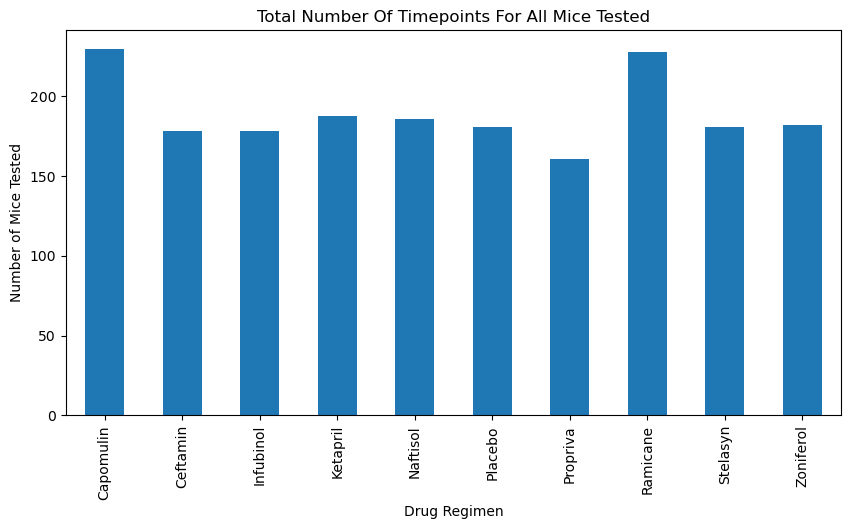

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = completedata.groupby("Drug Regimen").count()["Mouse ID"]

treated_mice = mice_count.plot(kind='bar', figsize=(10,5),
                              xlabel= "Drug Regimen",
                              ylabel= "Number of Mice Tested",
                              title= "Total Number Of Timepoints For All Mice Tested")

plt.show()

In [23]:
completedata["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Drug_groups = completedata.groupby("Drug Regimen")
Drug_df = pd.DataFrame(Drug_groups["Drug Regimen"].count())
x_axis = np.arange(len(Drug_df["Drug Regimen"]))

Text(0.5, 0, 'Drug Regimen')

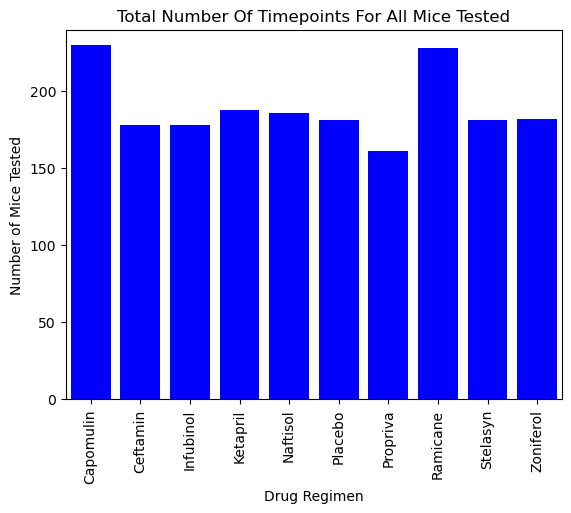

In [25]:
plt.bar(x_axis, Drug_df["Drug Regimen"], color="b", alpha=1, align="center")

tick_loc = [value for value in x_axis]

plt.xticks(tick_loc, list(Drug_df.index), rotation="vertical")
plt.xlim(-0.5, len(x_axis) - 0.5)
plt.ylim(0, max(Drug_df["Drug Regimen"]) + 10)
plt.title("Total Number Of Timepoints For All Mice Tested")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")

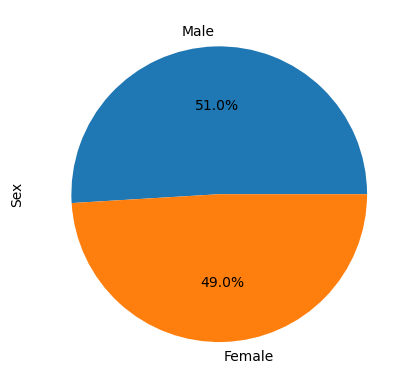

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleandata["Sex"].value_counts()
gender_df.plot(kind='pie', autopct="%1.1f%%")
plt.show()

In [27]:
gender_df = cleandata["Sex"].value_counts()
gender_df

Male      958
Female    922
Name: Sex, dtype: int64

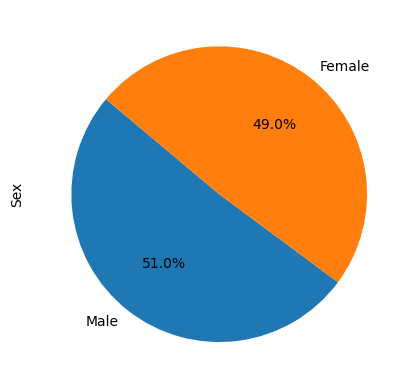

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_df, labels=labels, autopct = "%1.1f%%", startangle=140)
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = completedata.loc[completedata["Drug Regimen"] == "Capomulin"]
Ramicane_df = completedata.loc[completedata["Drug Regimen"] == "Ramicane"]
Infubinol_df = completedata.loc[completedata["Drug Regimen"] == "Infubinol"]
Ceftamin_df = completedata.loc[completedata["Drug Regimen"] == "Ceftamin"]


In [30]:
# Start by getting the last (greatest) timepoint for each mouse
timepoint = completedata.groupby("Mouse ID")
last_timepoint = timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

In [31]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
total_tumor_volume = pd.merge(last_timepoint_df, cleandata, on=["Mouse ID", "Timepoint"])
total_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in treatment_drugs:
    volume = total_tumor_volume.loc[total_tumor_volume["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(volume)
     
    quartiles = volume.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    IQR = upper - lower
    # Determine outliers using upper and lower bounds
    lower_bound = lower - (1.5*IQR)
    upper_bound = upper + (1.5*IQR)
    print(f"{drugs}'s potential outliers: {upper_bound} , {lower_bound}")

Capomulin's potential outliers: 51.83201549 , 20.70456164999999
Ramicane's potential outliers: 54.30681135 , 17.912664470000003
Infubinol's potential outliers: 82.74144559000001 , 36.83290494999999
Ceftamin's potential outliers: 87.66645829999999 , 25.355449580000002


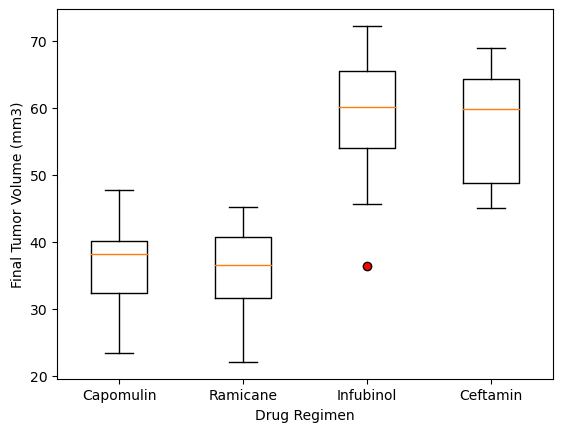

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, Drug_Tumor = plt.subplots()
Drug_Tumor.boxplot(tumor_vol_data, labels = treatment_drugs, flierprops = {'markerfacecolor':'r'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

# Line and Scatter Plots 

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]

In [36]:
# Identify specific mouse ID
time_mouse_id = "l509"
time_mouse = Capomulin_df.loc[Capomulin_df["Mouse ID"]== time_mouse_id]

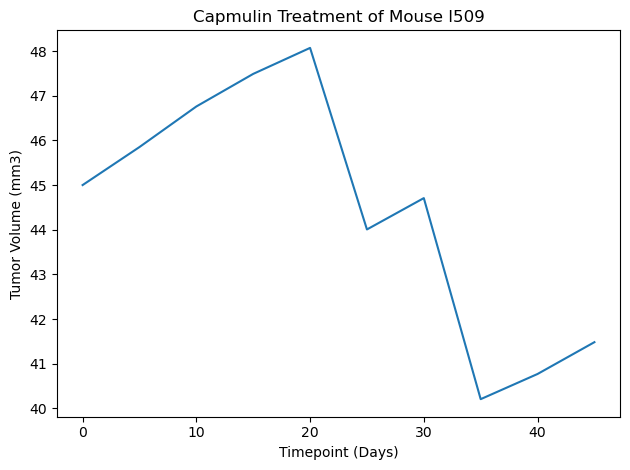

In [39]:
# Generate a line plot
time_tumor_vol = plt.plot(time_mouse["Timepoint"], time_mouse["Tumor Volume (mm3)"])
# Set label and title for plot
plt.title("Capmulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

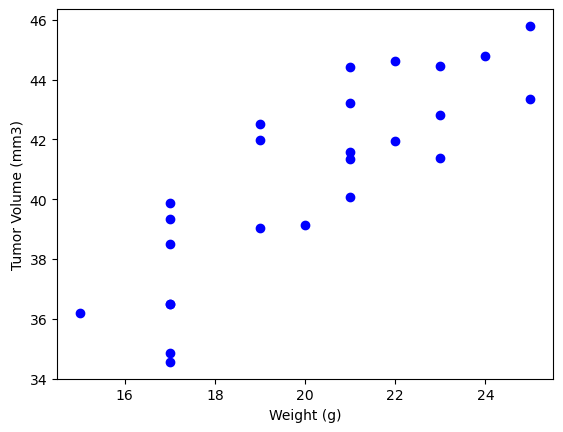

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, mouse_total_ave = plt.subplots()
mouse_averages = Capomulin_df.groupby(["Mouse ID"]).mean()
mouse_weight_df = mouse_averages["Weight (g)"]
mouse_tumor_ave = mouse_averages["Tumor Volume (mm3)"]

plt.scatter(mouse_weight_df, mouse_tumor_ave, color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(mouse_weight_df, mouse_tumor_ave)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


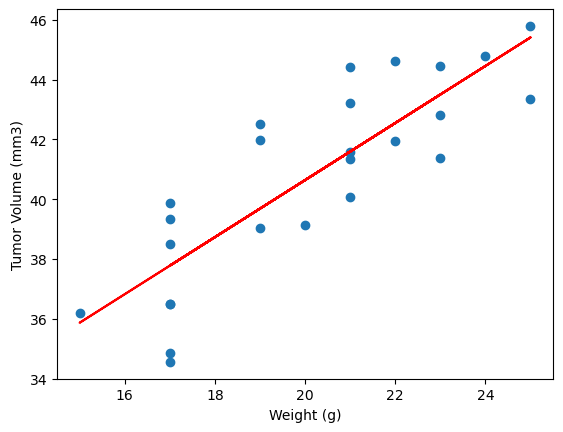

In [42]:
fig2, mouse_total_ave = plt.subplots()
mouse_averages = Capomulin_df.groupby(["Mouse ID"]).mean()
x_values = mouse_averages["Weight (g)"]
y_values = mouse_averages["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()